In [ ]:
import pandas as pd
import mne
import sys
import numpy as np
from mne import Epochs, pick_types, find_events
from mne.io import read_raw_edf
from scipy.signal import butter, lfilter
from mne.io import concatenate_raws

In [ ]:
runs = [3, 4, 7]
raw_data = mne.datasets.eegbci.load_data(1, runs)

    # get all the data needed in one
raw = concatenate_raws([read_raw_edf(data, preload=True) for data in raw_data])

In [ ]:
print(raw.info)

Using matplotlib as 2D backend.


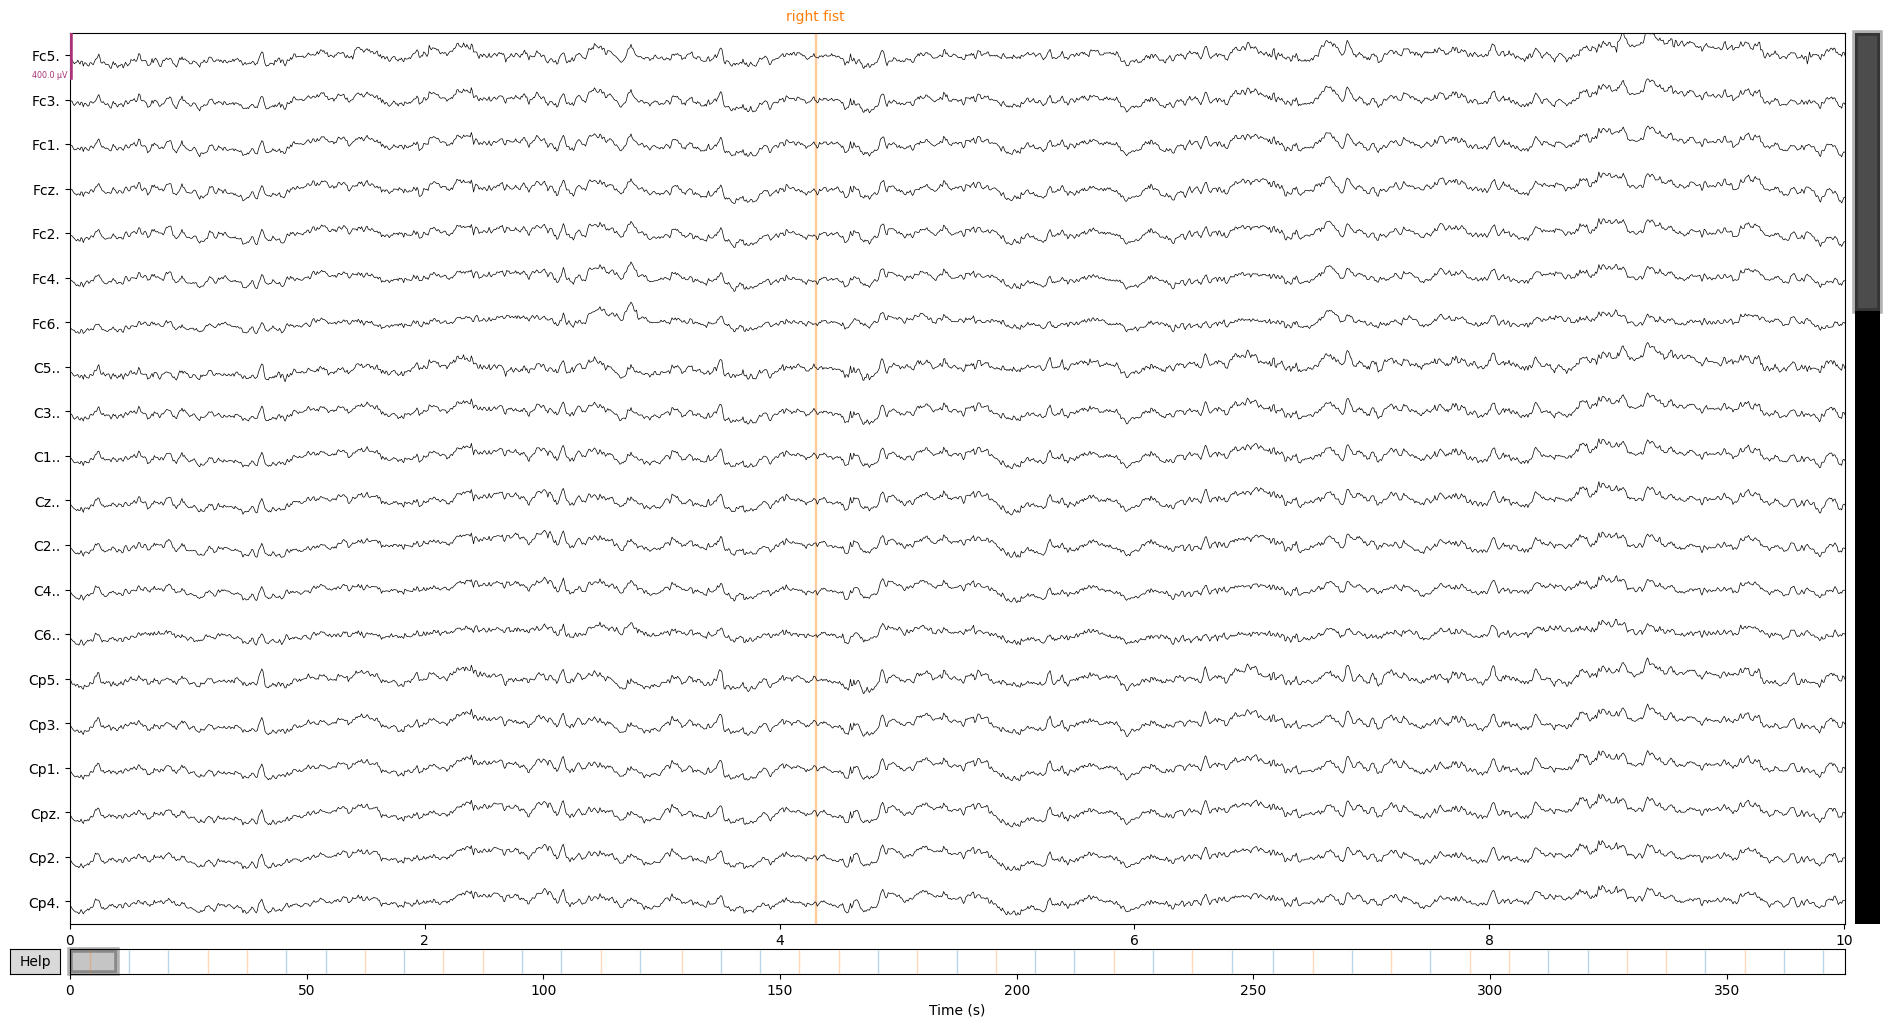

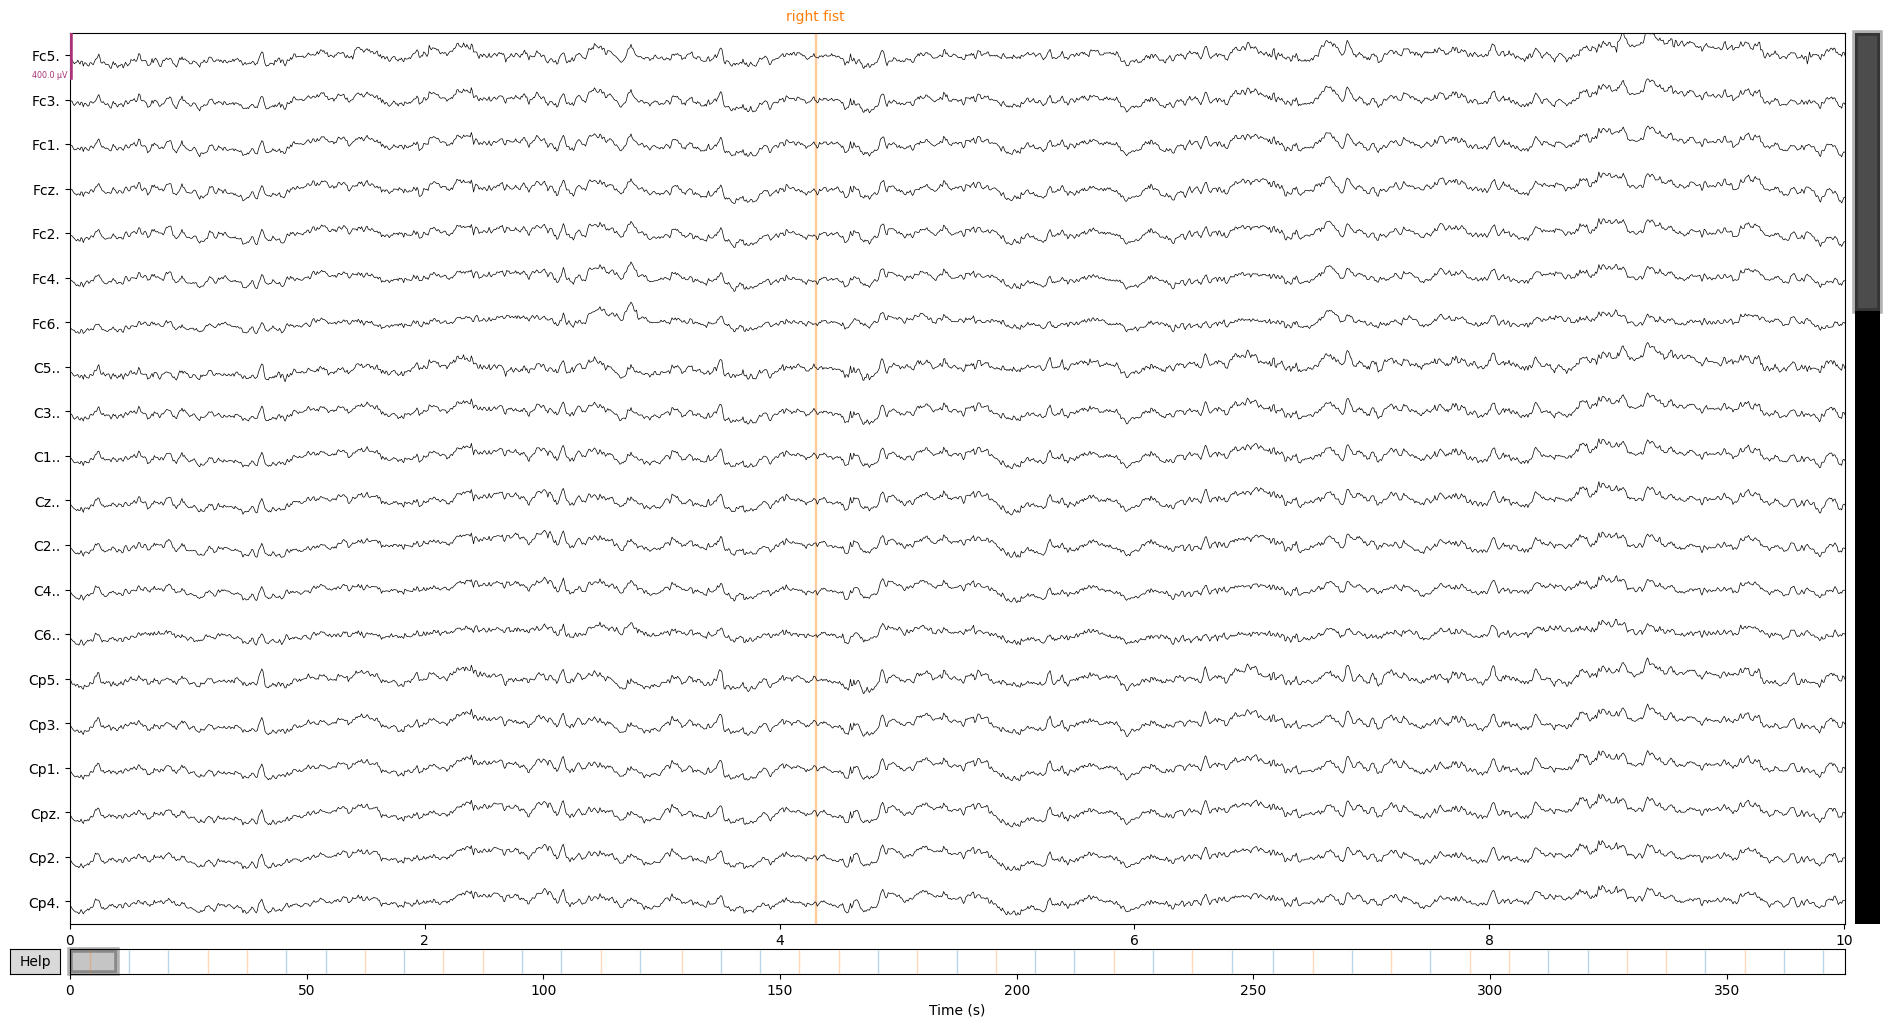

In [4]:
event_id = {'T1': 1, 'T2': 2}  # Define the event IDs
events, _ = mne.events_from_annotations(raw, event_id=event_id)
# Creating annotation from events
sfreq = raw.info["sfreq"]
event_desc = {0: "rest", 1: "left fist", 2: "right fist"}
annotations = mne.annotations_from_events(events=events, event_desc=event_desc, sfreq=sfreq)
# mne.annotations_from_events?
# set annotation dans le raw
raw = raw.set_annotations(annotations=annotations)
raw.plot(scalings=0.0002)

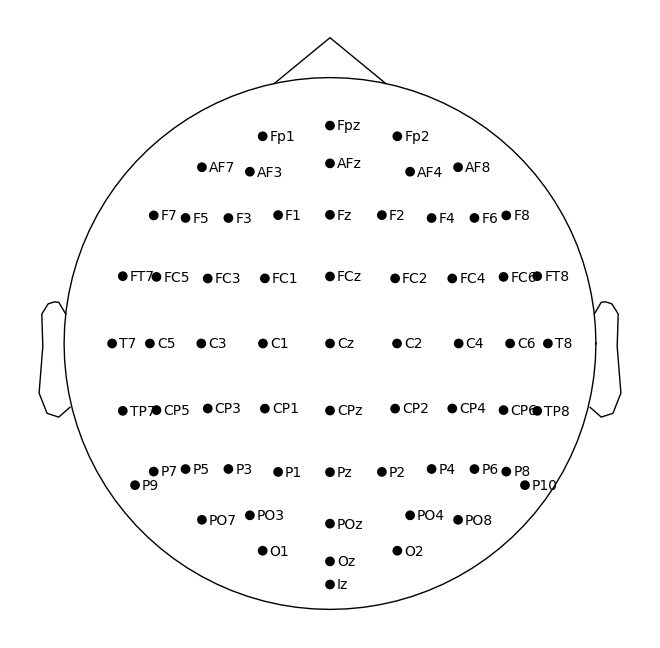

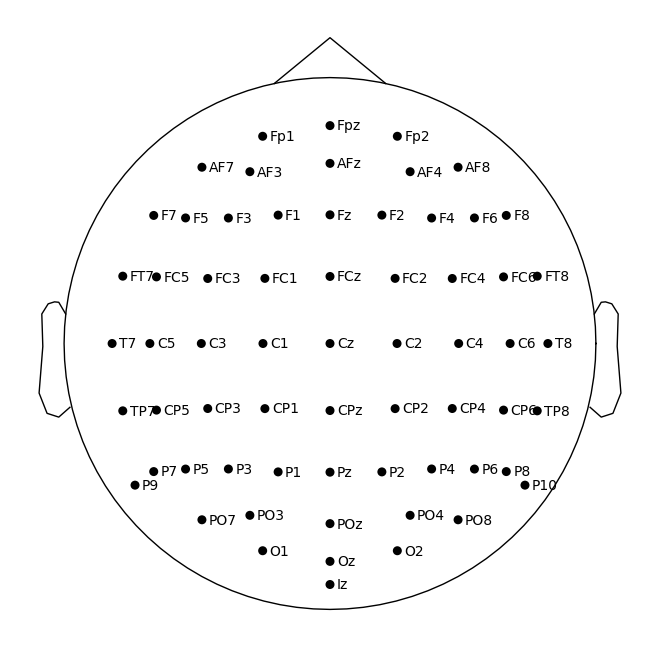

In [5]:
mne.datasets.eegbci.standardize(raw=raw)
montage = mne.channels.make_standard_montage('biosemi64') # 64 electrodes
raw.set_montage(montage, on_missing='ignore')
montage.plot()

In [10]:
events_found = mne.find_events(raw)


ValueError: No stim channels found, but the raw object has annotations. Consider using mne.events_from_annotations to convert these to events.

In [ ]:
# picks = mne.pick_types(raw.info, meg=True, eeg=False, eog=True, stim=False)
spec = raw.compute_psd(fmin = 7, fmax= 30)
spec.plot()
# mne.minimum_norm.compute_source_psd?

In [ ]:
channels = raw.info["ch_names"]
print(len(channels))
ica = mne.preprocessing.ICA(n_components=len(channels) - 2, random_state=0)
channel_name = {'T9', 'T10'}
raw.drop_channels(ch_names=channel_name, on_missing='ignore')
ica.fit(raw)
print(len(raw.info["ch_names"]))
ica.plot_components(outlines='head')
# ica.plot_components?
